# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (12/27까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x): 
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

k=336: f(2.250152587890625)=-6.542968514237657
[f(0), f(9/4), f(-2), f(4)]= [2, -6.54296875, 42, 66]


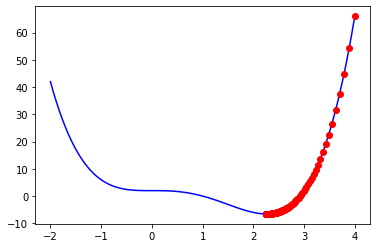

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1: 최소화할 함수 f(x) 정의
def f(x):
    return x**4 - 3*x**3 +2

# forward difference : 미분 계산
def fprime(x): 
    h = 0.001
    return (f(x+h) - f(x))/h

#2: gradient descent method(경사하강법) 구현
k = 0
max_iters = 1000
lr = 0.001
tol = 1e-5

x_old = 0.0
x_new = 4.0
x_list = [x_new]
x = tf.Variable(x_new, dtype = tf.float32)

while abs(x_old-x_new) > tol and k < max_iters:
  k += 1
  x_old = x.numpy()
  step = lr * fprime(x)
  x.assign_sub(step, read_value = False)
  x_new = x.numpy()
  x_list.append(x_new)
print('k={}: f({})={}'.format(k, x_new, f(x_new)))

#3 : check solutions
print("[f(0), f(9/4), f(-2), f(4)]=", [f(0), f(9/4), f(-2), f(4)])

#4: draw graph
xs = tf.linspace(-2.0, 4.0, num = 101)
ys = f(xs)
plt.plot(xs, ys, 'b-')

#4-2: f(x_new), updated solutions
x_list = tf.constant(x_list, dtype = tf.float32)
y_list = f(x_list)
plt.plot(x_list, y_list, 'ro')
plt.show()

# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE 
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (12/27까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

x_train.shape y_train.shape (404, 13) (404,)


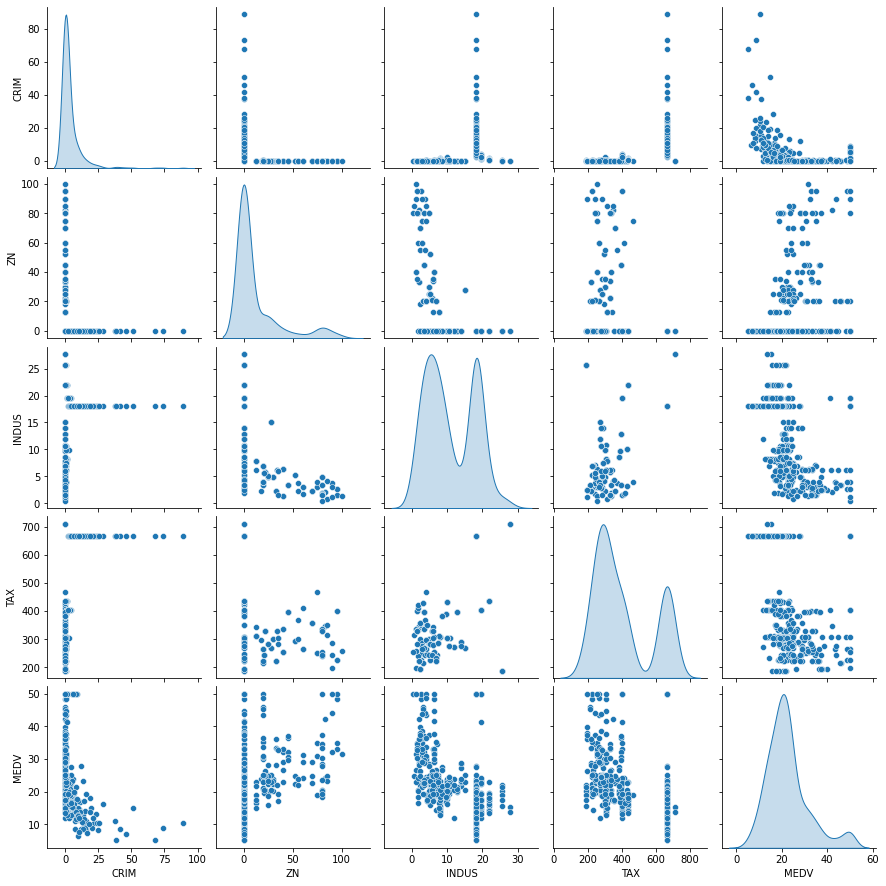

In [12]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')

In [13]:
# 데이터 전처리(정규화)
x_mean = x_train.mean(axis =  0)
x_std = x_train.std(axis =  0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis = 0)
y_std = y_train.std(axis = 0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

In [14]:
# 시퀀셜 모델 활용하여 딥러닝 네트워크 학습
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


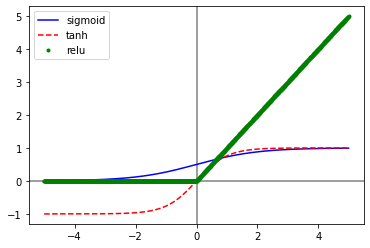

In [15]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [17]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 22ms/step - loss: 1.4034 - val_loss: 0.7850
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4341 - val_loss: 0.4308
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2606 - val_loss: 0.2722
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2090 - val_loss: 0.2518
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1782 - val_loss: 0.2505
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1913 - val_loss: 0.1849
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1840 - val_loss: 0.1813
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1670 - val_loss: 0.2215
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2314 - val_loss: 0.1841
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1529 - val_loss: 0.1593
Epoch 11/25
10/10 

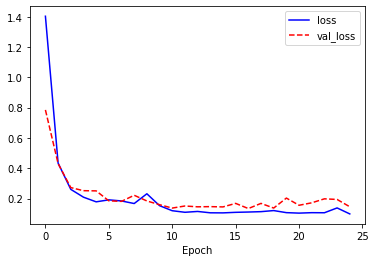

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4185


0.4185217618942261

4/4 [==============================] - 0s 3ms/step


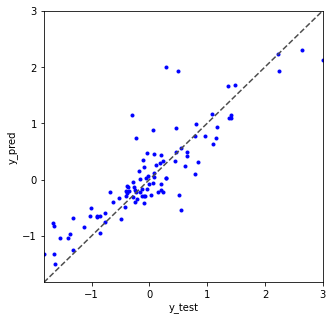

In [21]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])

# y=x에 해당하는 대각선
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [22]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 54ms/step - loss: 4.6246 - val_loss: 1.2857
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7330 - val_loss: 1.0309
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6512 - val_loss: 0.9630
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6103 - val_loss: 0.9086
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5690 - val_loss: 0.8664
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.5084 - val_loss: 0.8365
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4828 - val_loss: 0.8118
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4455 - val_loss: 0.7599
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4141 - val_loss: 0.6835
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.3638 - val_loss: 0.6038
Epoch 11/25
10/10 [==========

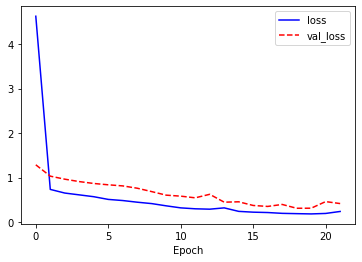

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


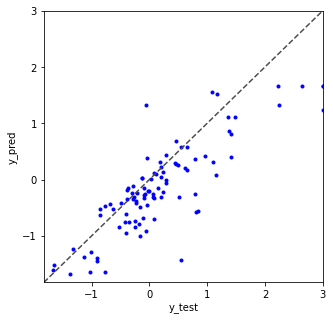

In [26]:
import matplotlib.pyplot as plt

model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])

# y=x에 해당하는 대각선
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()